# Terrorism Incidents in Iraq - حوادث الإرهاب في العراق

LinkedIn : https://www.linkedin.com/in/mohammed-mahdi-a15522231/

_________________________________

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install arabic_reshaper
# !pip install python-bidi
import arabic_reshaper
from bidi.algorithm import get_display

import folium
from folium.plugins import HeatMap, HeatMapWithTime

%matplotlib inline

In [2]:
data = pd.read_excel("data_iraq.xlsx")
print("Shape : " + str(data.shape))
data.head()

Shape : (26593, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197503010002,1975,3,1,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,Hijacking DB,-9,-9,0,-9,NaN
1,197612150001,1976,12,15,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
2,197612240001,1976,12,24,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197906150001,1979,6,15,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
4,198001280004,1980,1,28,NaN,0,NaT,95,Iraq,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### اختيار الاعمدة

In [3]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
cols = [
    "iyear",
    "imonth",
    "iday",
    "provstate",
    "city",
    "latitude",
    "longitude",
    "attacktype1_txt",
    "targtype1_txt",
    "targsubtype1_txt",
    "gname",
    "weaptype1_txt",
    "nkill",
    "target1",
    "success",
]

In [5]:
data = data[cols]
print("Shape : " + str(data.shape))
data.head()

Shape : (26593, 15)


,iyear,imonth,iday,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,weaptype1_txt,nkill,target1,success
0,1975,3,1,Nineveh,Mosul,36.354145,43.143570,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Unknown,Unknown,0.0,B-737,1
1,1976,12,15,Baghdad,Baghdad,33.303566,44.371773,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,Explosives,10.0,Airport terminal,1
2,1976,12,24,Baghdad,Baghdad,33.303566,44.371773,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Unknown,Firearms,2.0,Personnel,1
3,1979,6,15,Basra,Basra,30.510054,47.778095,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Unknown,Unknown,1.0,local secretary,1
4,1980,1,28,Baghdad,Baghdad,33.303566,44.371773,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Shia Muslim extremists,Melee,0.0,Middle east,1


### التحقق من البيانات

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26593 entries, 0 to 26592
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iyear             26593 non-null  int64  
 1   imonth            26593 non-null  int64  
 2   iday              26593 non-null  int64  
 3   provstate         26593 non-null  object 
 4   city              26577 non-null  object 
 5   latitude          26593 non-null  float64
 6   longitude         26593 non-null  float64
 7   attacktype1_txt   26593 non-null  object 
 8   targtype1_txt     26593 non-null  object 
 9   targsubtype1_txt  24760 non-null  object 
 10  gname             26593 non-null  object 
 11  weaptype1_txt     26593 non-null  object 
 12  nkill             25792 non-null  float64
 13  target1           26551 non-null  object 
 14  success           26593 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 3.0+ MB


In [7]:
data.isnull().sum()

iyear                  0
imonth                 0
iday                   0
provstate              0
city                  16
latitude               0
longitude              0
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt    1833
gname                  0
weaptype1_txt          0
nkill                801
target1               42
success                0
dtype: int64

### التخلص من البيانات المفقودة

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

iyear               0
imonth              0
iday                0
provstate           0
city                0
latitude            0
longitude           0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
gname               0
weaptype1_txt       0
nkill               0
target1             0
success             0
dtype: int64

### التخلص من البيانات المتكررة

In [9]:
print("Before : " + str(data.duplicated().sum()))
data.drop_duplicates(inplace=True)
print("After : " + str(data.duplicated().sum()))

Before : 1411
After : 0


### التحقق من انواع المتغيرات

In [10]:
data.dtypes

iyear                 int64
imonth                int64
iday                  int64
provstate            object
city                 object
latitude            float64
longitude           float64
attacktype1_txt      object
targtype1_txt        object
targsubtype1_txt     object
gname                object
weaptype1_txt        object
nkill               float64
target1              object
success               int64
dtype: object

In [11]:
# nkill -> float64 ?
data["nkill"] = data["nkill"].astype(int)
print(data["nkill"].unique())

[   0   10    2    1    3   20   76   14   11    4   51    7    5   26
   12   57    6   24    8    9   13   17   27   25   50   71   47   58
   28   22   74   35   60   34   40   70   21   41   15   16   23   29
   18   19  110   59   31   44   36  160   77   37   32   30   90   42
   56   33   61   46   65   88  120   66   92   45  145   72   53  153
  127   69  150   43   80  250   64   63   49   83   55  102   68   54
  670 1570   39   75  114   67  953  400  300  121   52  112   38   62
  383   97  100   82  284  190   98  130   93  230  151  163  200]


### التحقق من محتوى المتغيرات

#### provstate

In [12]:
data["provstate"].unique()

array(['Nineveh', 'Baghdad', 'Basra', 'At Tamim', 'Dihok', 'Saladin',
       'Sulaymaniyah', 'Arbil', 'Diyala', 'Maysan', 'Dhi Qar', 'Muthanna',
       'Karbala', 'Al Anbar', 'Wasit', 'Najaf', 'Babil', 'Kirkuk',
       'Qadisiyah', 'Al Qadisiyah', 'NIneveh', 'Balad Ruz', 'Halabja'],
      dtype=object)

In [13]:
data["provstate"] = data["provstate"].str.replace("NIneveh", "Nineveh").replace("Qadisiyah", "Al Qadisiyah")
data["provstate"].unique()

array(['Nineveh', 'Baghdad', 'Basra', 'At Tamim', 'Dihok', 'Saladin',
       'Sulaymaniyah', 'Arbil', 'Diyala', 'Maysan', 'Dhi Qar', 'Muthanna',
       'Karbala', 'Al Anbar', 'Wasit', 'Najaf', 'Babil', 'Kirkuk',
       'Al Qadisiyah', 'Balad Ruz', 'Halabja'], dtype=object)

#### iyear

In [14]:
data["iyear"].unique()

array([1975, 1976, 1979, 1980, 1982, 1983, 1984, 1987, 1988, 1989, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

In [15]:
data.head(3)

,iyear,imonth,iday,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,weaptype1_txt,nkill,target1,success
0,1975,3,1,Nineveh,Mosul,36.354145,43.143570,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Unknown,Unknown,0,B-737,1
1,1976,12,15,Baghdad,Baghdad,33.303566,44.371773,Bombing/Explosion,Airports & Aircraft,Airport,Unknown,Explosives,10,Airport terminal,1
2,1976,12,24,Baghdad,Baghdad,33.303566,44.371773,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Unknown,Firearms,2,Personnel,1


In [16]:
lat = data["latitude"].values
lon = data["longitude"]
nkill = data["nkill"]

### نظرة عامة على احداثيات الحوادث الارهابية

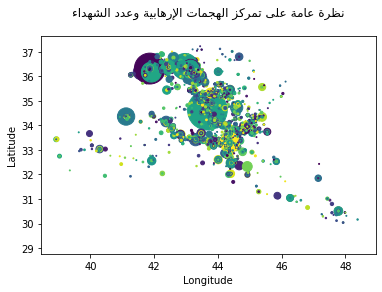

In [ ]:
colors = np.random.rand(22538)
plt.scatter(x=lon, y=lat, c=colors, s=nkill)

xlbl = "Longitude"
ylbl = "Latitude"
title = "نظرة عامة على تمركز الهجمات الإرهابية وعدد الشهداء"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))

plt.title(title, pad=20)
plt.xlabel(xlbl)
plt.ylabel(ylbl)

plt.savefig('general_1.svg', format='svg', dpi=1200)
plt.show()

In [23]:
lat = data['latitude'][:]
lon = data['longitude'][:]
lats_longs = list(zip(lat, lon))

map_obj = folium.Map(location = [33.312805, 44.361488], zoom_start = 10, tiles="Stamen Toner")

HeatMap(lats_longs).add_to(map_obj)
#map_obj.save("الخريطة_1.html")
map_obj

### نظرة عامة على احداثيات الحوادث الارهابية قبل سنة 2003

In [24]:
lat = data[data["iyear"] < 2003]['latitude'][:]
lon = data[data["iyear"] < 2003]['longitude'][:]
lats_longs = zip(lat, lon)

map_obj = folium.Map(location = [33.312805, 44.361488], zoom_start = 10, tiles="Stamen Toner")
HeatMap(lats_longs).add_to(map_obj)
#map_obj.save("before_2003.html")
map_obj

### نظرة عامة على احداثيات الحوادث الارهابية بعد سنة 2003

In [26]:
lat = data[data["iyear"] > 2003]['latitude'][:]
lon = data[data["iyear"] > 2003]['longitude'][:]
lats_longs = zip(lat, lon)

map_obj = folium.Map(location = [33.312805, 44.361488], zoom_start = 10, tiles="Stamen Toner")
HeatMap(lats_longs).add_to(map_obj)
#map_obj.save("after_2003.html")
map_obj

### عدد الهجمات خلال السنوات وماهي السنة الأكثر تعرضا؟

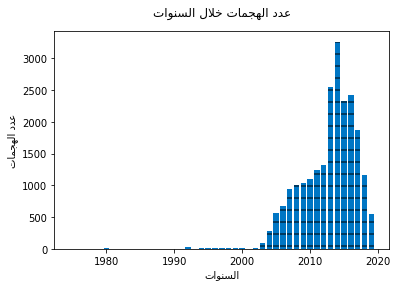

In [ ]:
x = data.groupby("iyear")["nkill"].count().index
y = data.groupby("iyear")["nkill"].count().values

plt.bar(x=x, height=y, color="#0076c4", hatch="-", width=.8)

xlbl = "السنوات"
ylbl = "عدد الهجمات"
title = "عدد الهجمات خلال السنوات"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
#plt.savefig('years_attacks_count.svg', format='svg', dpi=1200)
plt.show();

### المقارنة بين عدد الهجمات الإرهابية في كل محافظة

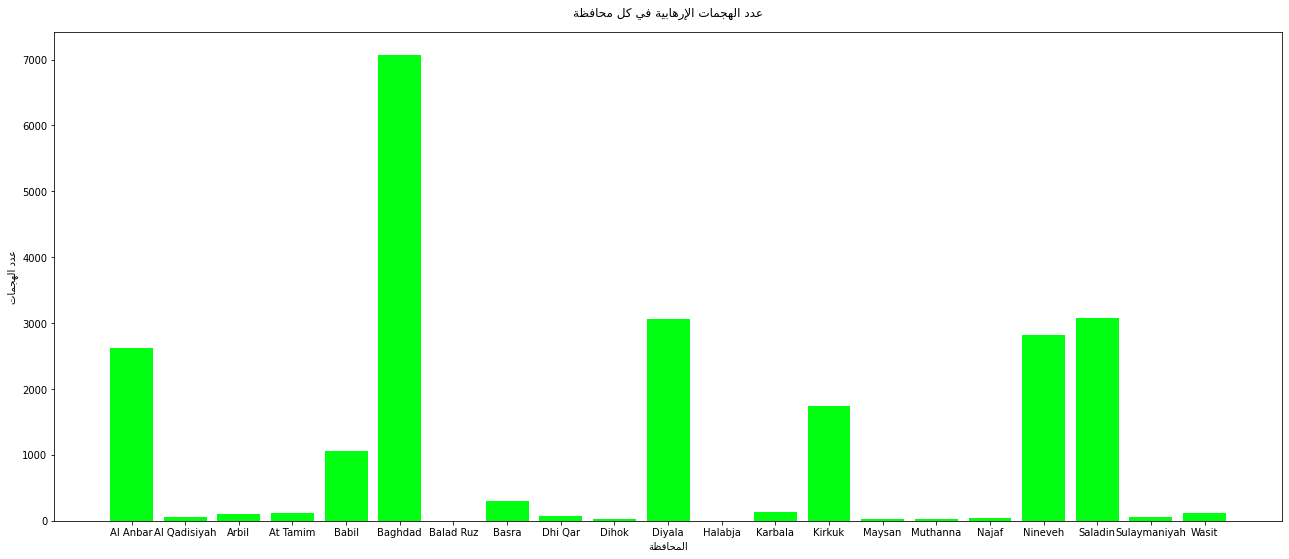

In [ ]:
x = data.groupby("provstate")["nkill"].count().index
y = data.groupby("provstate")["nkill"].count().values

fig, ax = plt.subplots(figsize=(22, 9))

plt.bar(x=x, height=y, color="#00ff11", width=.8)

xlbl = "المحافظة"
ylbl = "عدد الهجمات"
title = "عدد الهجمات الإرهابية في كل محافظة"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
#plt.savefig('provstate_attackcount.svg', format='svg', dpi=1200)
plt.show();

### نسب الحوادث لكل سنة

In [ ]:
def iyear_percentage(df):
    years = df["iyear"].unique()
    total = len(df)
    
    for year in years:
        mask = data["iyear"] == year
        print(f"Year {year} : {round((len(df[mask]) / total) * 100, 2)}%")
        
iyear_percentage(data)

Year 1975 : 0.0%
Year 1976 : 0.01%
Year 1979 : 0.0%
Year 1980 : 0.03%
Year 1982 : 0.01%
Year 1983 : 0.01%
Year 1984 : 0.0%
Year 1987 : 0.01%
Year 1988 : 0.01%
Year 1989 : 0.01%
Year 1991 : 0.01%
Year 1992 : 0.12%
Year 1994 : 0.04%
Year 1995 : 0.06%
Year 1996 : 0.05%
Year 1997 : 0.07%
Year 1998 : 0.03%
Year 1999 : 0.04%
Year 2000 : 0.03%
Year 2001 : 0.01%
Year 2002 : 0.02%
Year 2003 : 0.39%
Year 2004 : 1.27%
Year 2005 : 2.48%
Year 2006 : 2.97%
Year 2007 : 4.18%
Year 2008 : 4.47%
Year 2009 : 4.63%
Year 2010 : 4.87%
Year 2011 : 5.54%
Year 2012 : 5.83%
Year 2013 : 11.33%
Year 2014 : 14.48%
Year 2015 : 10.35%
Year 2016 : 10.72%
Year 2017 : 8.32%
Year 2018 : 5.13%
Year 2019 : 2.46%


### نسب وعدد الحوادث لكل محافظة

In [ ]:
def provstate_percentage(df):
    states = df["provstate"].unique()
    total = len(df)
    
    for state in states:
        mask = data["provstate"] == state
        print(f"{state} : {round((len(df[mask]) / total) * 100, 2)}%")
        
provstate_percentage(data)

Nineveh : 12.49%
Baghdad : 31.38%
Basra : 1.31%
At Tamim : 0.49%
Dihok : 0.13%
Saladin : 13.67%
Sulaymaniyah : 0.28%
Arbil : 0.47%
Diyala : 13.6%
Maysan : 0.15%
Dhi Qar : 0.3%
Muthanna : 0.09%
Karbala : 0.59%
Al Anbar : 11.66%
Wasit : 0.5%
Najaf : 0.21%
Babil : 4.73%
Kirkuk : 7.7%
Al Qadisiyah : 0.24%
Balad Ruz : 0.0%
Halabja : 0.0%


In [ ]:
def provstate_count(df):
    states = df["provstate"].unique()
    
    total = 0
    
    for state in states:
        mask = data["provstate"] == state
        print(f"{state} : {len(df[mask])}")
        total += len(df[mask])
        
    print(f"\nTotal {total}")
provstate_count(data)

Nineveh : 2815
Baghdad : 7072
Basra : 296
At Tamim : 111
Dihok : 30
Saladin : 3082
Sulaymaniyah : 62
Arbil : 107
Diyala : 3065
Maysan : 33
Dhi Qar : 67
Muthanna : 21
Karbala : 133
Al Anbar : 2628
Wasit : 112
Najaf : 47
Babil : 1065
Kirkuk : 1736
Al Qadisiyah : 54
Balad Ruz : 1
Halabja : 1

Total 22538


### المقارنة بين عدد الشهداء في كل محافظة

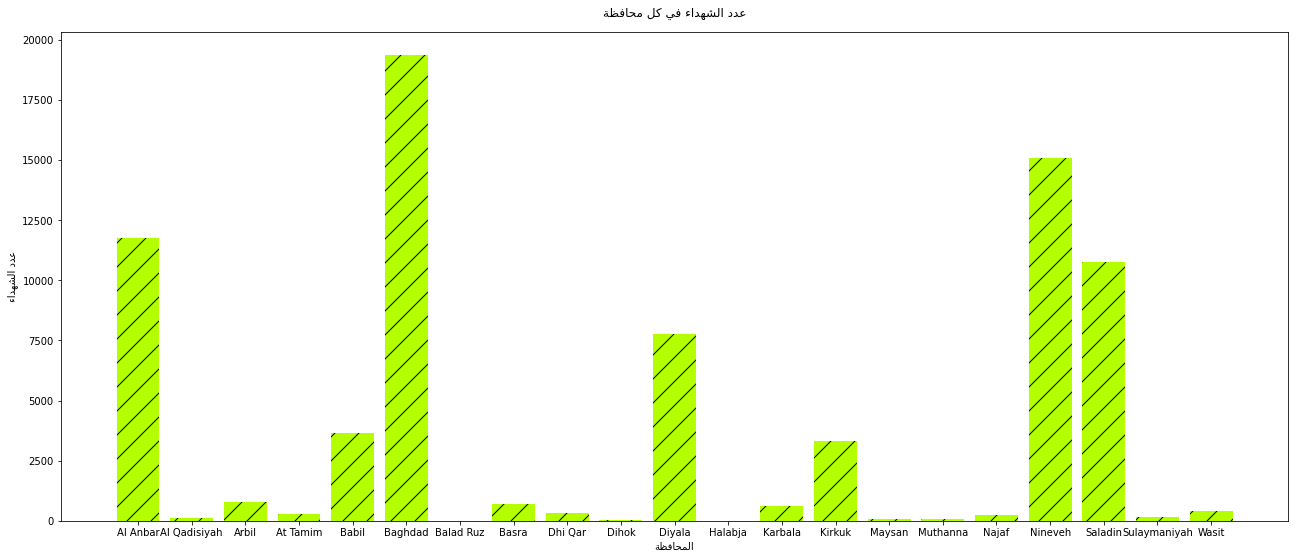

In [ ]:
x = data.groupby("provstate")["nkill"].sum().index
y = data.groupby("provstate")["nkill"].sum().values

fig, ax = plt.subplots(figsize=(22, 9))

plt.bar(x=x, height=y, color="#b3ff00", hatch="/", width=.8)

xlbl = "المحافظة"
ylbl = "عدد الشهداء"
title = "عدد الشهداء في كل محافظة"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
plt.savefig('provstate_killcount.svg', format='svg', dpi=1200)
plt.show();

### الهجمة الإرهابية الأعلى من حيث عدد الشهداء

In [ ]:
mask = data["nkill"] == data["nkill"].max()
data[mask]

,iyear,imonth,iday,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,gname,weaptype1_txt,nkill,target1,success
14304,2014,6,12,Saladin,Tikrit,34.621521,43.668375,Hostage Taking (Kidnapping),Military,"Military Personnel (soldiers, troops, officers...",Islamic State of Iraq and the Levant (ISIL),Firearms,1570,Soldiers,1


In [ ]:
# map_obj = folium.Map(location = [33.312805, 44.361488], zoom_start = 10)
# HeatMap(zip(data[mask]["latitude"], data[mask]["longitude"])).add_to(map_obj)
# map_obj

### أنواع الهجمات قبل وبعد سنة 2003

In [ ]:
mask = data["iyear"] < 2003
data[mask]["attacktype1_txt"].value_counts()

Bombing/Explosion                 73
Assassination                     28
Armed Assault                     18
Unknown                            7
Hostage Taking (Kidnapping)        3
Hijacking                          2
Facility/Infrastructure Attack     2
Name: attacktype1_txt, dtype: int64

In [ ]:
mask = data["iyear"] > 2003
data[mask]["attacktype1_txt"].value_counts()

Bombing/Explosion                      16144
Armed Assault                           3228
Assassination                           1354
Unknown                                  821
Hostage Taking (Kidnapping)              597
Facility/Infrastructure Attack           128
Hostage Taking (Barricade Incident)       28
Unarmed Assault                            9
Hijacking                                  7
Name: attacktype1_txt, dtype: int64

### من هي أكثر الجهات تنفيذا للهجمات الإرهابية؟

In [ ]:
data["gname"].value_counts()

Unknown                                        16850
Islamic State of Iraq and the Levant (ISIL)     4558
Al-Qaida in Iraq                                 553
Islamic State of Iraq (ISI)                      137
Gunmen                                            56
                                               ...  
Anbar Salvation Council                            1
Diyala Salvation Council                           1
Jaish al-Ta'ifa al-Mansura                         1
Islamist extremists                                1
Islamic Companies                                  1
Name: gname, Length: 87, dtype: int64

### ماهي نسبة نجاح الهجمات؟

In [ ]:
data["success"].value_counts()[1]

20902

In [ ]:
round((data["success"].value_counts()[1] / len(data)) * 100, 2)

92.74

### ماهي الأهداف التي استقبلت أكثر من 1500 هجمة؟

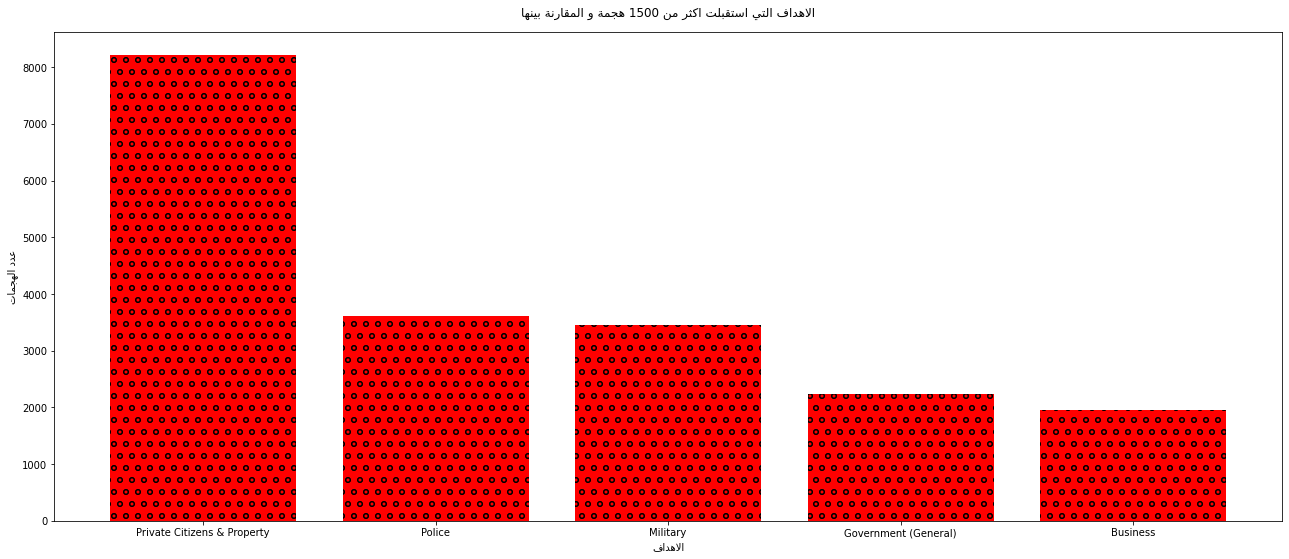

In [ ]:
x = list(data["targtype1_txt"].value_counts(sort=True)[:5].index)
y = list(data["targtype1_txt"].value_counts(sort=True)[:5].values)

fig, ax = plt.subplots(figsize=(22, 9))

plt.bar(x=x, height=y, color="#ff0000", hatch="o", width=.8)

xlbl = "الاهداف"
ylbl = "عدد الهجمات"
title = "الاهداف التي استقبلت اكثر من 1500 هجمة و المقارنة بينها"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
# plt.savefig('attacktypeandcount.svg', format='svg', dpi=1200)
plt.show();

### نسب أنواع الأسلحة الأكثر استخداما في الهجمات

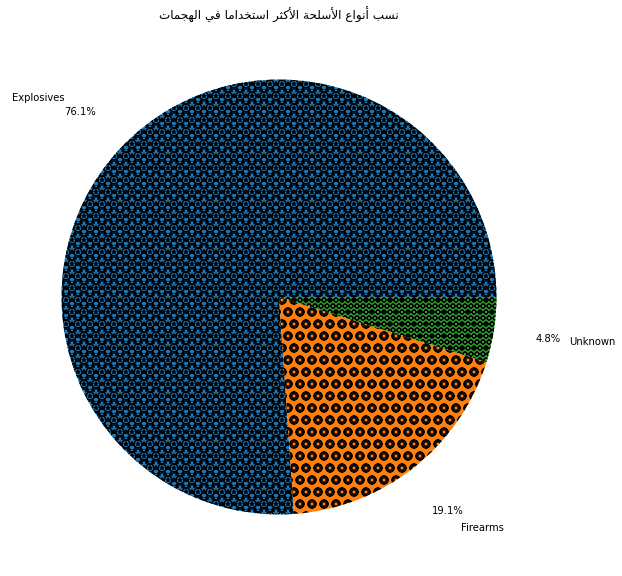

In [ ]:
labels = data["weaptype1_txt"].value_counts(sort=True)[:3].index
values = data["weaptype1_txt"].value_counts(sort=True)[:3].values
title = title = get_display( arabic_reshaper.reshape("نسب أنواع الأسلحة الأكثر استخداما في الهجمات"))


fig, ax = plt.subplots(figsize=(20, 10))

plt.pie(values, labels=labels, autopct='%1.1f%%', hatch=['**O', 'oO', 'O.O', '.||.'], pctdistance=1.25, labeldistance=1.35)
plt.title(title)
# plt.savefig('typepercentage.svg', format='svg', dpi=1200)
plt.show()

### اعلى 5 مدن استقبالا للهجمات الإرهابية 

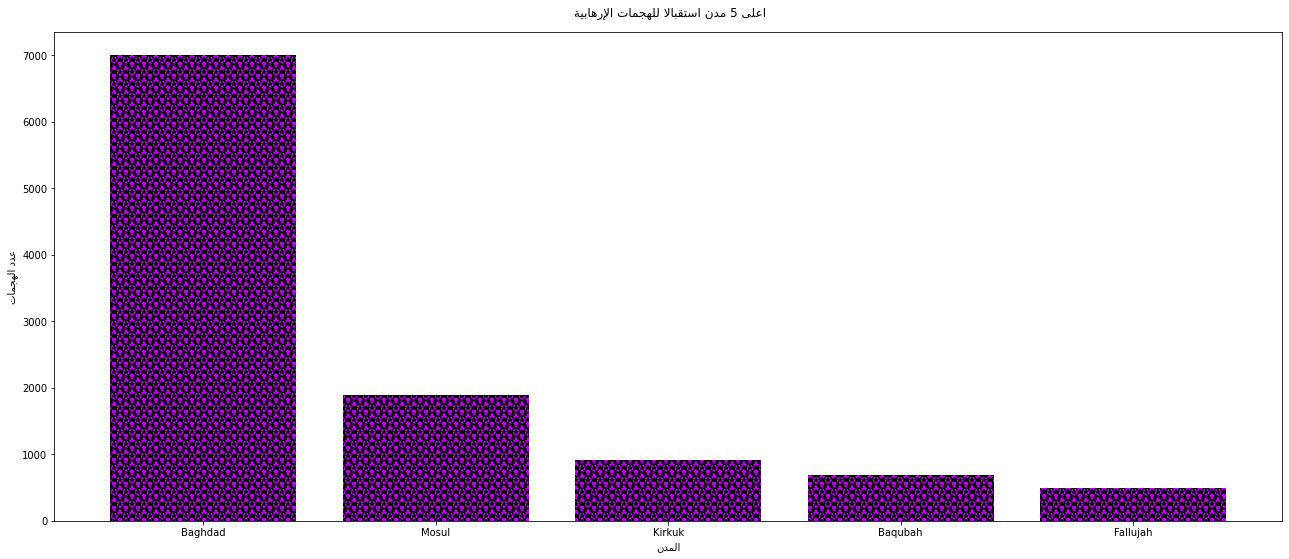

In [ ]:
city = data.groupby("city")["target1"].count().nlargest(5).index
count = data.groupby("city")["target1"].count().nlargest(5).values

fig, ax = plt.subplots(figsize=(22, 9))

plt.bar(x=city, height=count, color="#c800ff", hatch="**O", width=.8)

xlbl = "المدن"
ylbl = "عدد الهجمات"
title = "اعلى 5 مدن استقبالا للهجمات الإرهابية "
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
# plt.savefig('top5cıty.svg', format='svg', dpi=1200)
plt.show();

### كيف تغير عدد الشهداء خلال السنوات؟

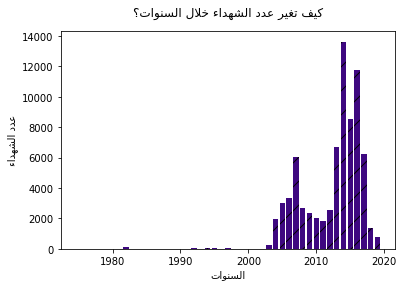

In [ ]:
x = data.groupby("iyear")["nkill"].sum().index
y = data.groupby("iyear")["nkill"].sum().values

plt.bar(x=x, height=y, color="#3e0880", hatch="/", width=.8)

xlbl = "السنوات"
ylbl = "عدد الشهداء"
title = "كيف تغير عدد الشهداء خلال السنوات؟"
xlbl = get_display( arabic_reshaper.reshape(xlbl))
ylbl = get_display( arabic_reshaper.reshape(ylbl))
title = get_display( arabic_reshaper.reshape(title))
pad = 15

plt.title(title, pad=pad)
plt.xlabel(xlbl)
plt.ylabel(ylbl)
#plt.savefig('years_nkill.svg', format='svg', dpi=1200)
plt.show();